In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

Using TensorFlow backend.


In [ ]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20


In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

네트워크를 직접 설계해 보세요!

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation = 'relu')) #3,3 은 필터 크기?
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10,activation = 'softmax'))


W0712 04:17:29.981919 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 04:17:29.998586 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 04:17:30.002579 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 04:17:30.016067 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 04:17:30.041393 14055

In [ ]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0712 04:17:31.370630 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 04:17:31.382128 140550987459968 deprecation_wrapper.py:119] From /home/work/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
xTrain = x_train[:40000]
yTrain = y_train[:40000]

xVal = x_train[40000:]
yVal = y_train[40000:]


trained_model = model.fit(xTrain, yTrain,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(xVal, yVal),
          shuffle=True)
#validation에서 test data안 쓰려면 train data slicing 하기

W0712 04:17:31.962199 140550987459968 deprecation.py:323] From /home/work/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 133s 3ms/step - loss: 1.9902 - acc: 0.2675 - val_loss: 1.6952 - val_acc: 0.3945
Epoch 2/20
40000/40000 [==============================] - 130s 3ms/step - loss: 1.6677 - acc: 0.3937 - val_loss: 1.5281 - val_acc: 0.4426
Epoch 3/20
40000/40000 [==============================] - 133s 3ms/step - loss: 1.5104 - acc: 0.4546 - val_loss: 1.3656 - val_acc: 0.5121
Epoch 4/20
40000/40000 [==============================] - 126s 3ms/step - loss: 1.4036 - acc: 0.4933 - val_loss: 1.2872 - val_acc: 0.5405
Epoch 5/20
40000/40000 [==============================] - 124s 3ms/step - loss: 1.3151 - acc: 0.5267 - val_loss: 1.2479 - val_acc: 0.5594
Epoch 6/20
40000/40000 [==============================] - 131s 3ms/step - loss: 1.2491 - acc: 0.5533 - val_loss: 1.1513 - val_acc: 0.5938
Epoch 7/20
40000/40000 [==============================] - 133s 3ms/step - loss: 1.1840 - acc: 0.5769 - val_loss: 1.1315 - 

In [ ]:
epochs_range = range(20)
validation_accuracy = trained_model.history['val_acc']
training_accuracy = trained_model.history['acc']

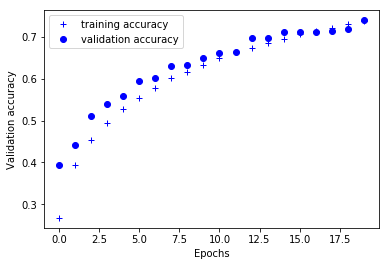

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 6s 569us/step
Test loss: 0.7625089873313904
Test accuracy: 0.7332
